#### Importing libraries, defining path and importing the raw csv data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path =r'C:\Users\dog\Desktop\Boat sales'

In [3]:
# importing raw data
df_boats_raw = pd.read_csv(os.path.join(path, '01 Raw Data', 'boat_data.csv'))

#### checking data and potential data issues

In [4]:
# checking imported data and searching for issues
df_boats_raw.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


1. Price column  must be devided into two separate columns in order to be able work with variables
2. Location column  seems to use special symbols, which we are unable to implement into Geolocations later, therefore must be removed and converted into countries we can use

In [5]:
df_boats_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


3. Format of the price must be changed to int64 after  splitting into currency and values columns

In [6]:
df_boats_raw.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

C:\Users\dog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

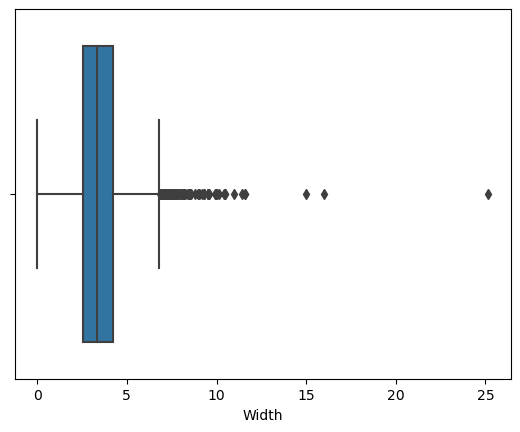

In [7]:
# checking what to use for imputation of width and length
sns.boxplot(df_boats_raw.Width)

C:\Users\dog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

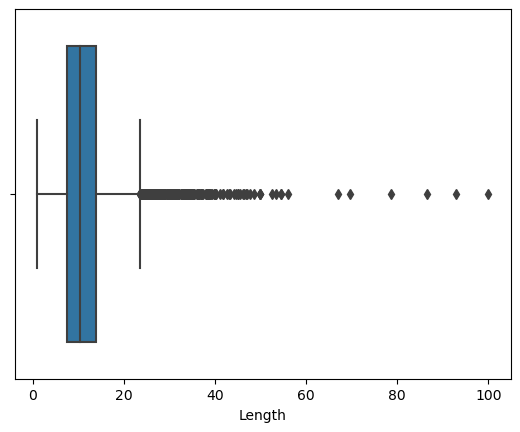

In [8]:
sns.boxplot(df_boats_raw.Length)

4. Missing manufacturer must be changed to unknown in order to be able work with the data
5. Missing Matterial values must be changed to uknnown in order to be able work with the data
6. Missing Length can be replaced with median due to outliers
7. Missing Width can be replaced with the median due to outliers 
8. due to different currencies data must be changed to one price format so that it is possible to use it

#### Wrangling data and creating new variables

In [9]:
# checking for duplicates

In [10]:
df_boats_raw_checked = df_boats_raw[df_boats_raw.duplicated()]

In [11]:
df_boats_raw_checked.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days


In [12]:
# no duplicates are found

In [13]:
# implacing missing length data
df_boats_raw['Length'] = df_boats_raw['Length'].fillna(df_boats_raw['Length'].median())

In [14]:
# implacing missing width data
df_boats_raw['Width'] = df_boats_raw['Width'].fillna(df_boats_raw['Length'].median())

In [15]:
# implacing missing manufacturer with uknnown 
df_boats_raw['Manufacturer'].fillna('unknown', inplace=True)

In [16]:
# implacing missing Material data with uknnown
df_boats_raw['Material'].fillna('unknown', inplace=True)

In [17]:
# deviding Price column into 2 new columns
df_boats_raw[['currency','value']]= df_boats_raw['Price'].str.split(' ', 1, expand=True)

In [18]:
# checking if new columns were added
df_boats_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 9888 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     9888 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  currency                     9888 non-null   object 
 11  value                        9888 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 927.1+ KB


In [19]:
# checking if that was devided correctly
df_boats_raw.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,Denmark Â» Svendborg,64,DKK,25900
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [20]:
#dropping unnecessary column
df_boats_raw.drop(labels=['Price'], axis=1, inplace=True)

In [21]:
df_boats_raw['currency'].value_counts(dropna = False)

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [22]:
# creating another column with converted currency
def price_in_eur(currency, value):
    if currency in ('EUR', 'CHF', np.nan):
        return value
    elif currency == 'DKK':
        return value * 0.13
    elif currency == 'Â£':
        return value * 1.14

In [23]:
df_boats_raw['value']=df_boats_raw['value'].astype(np.int64)

In [24]:
df_boats_raw['value_in_eur'] = df_boats_raw.apply(lambda x: price_in_eur(x['currency'], x['value']), axis=1)


In [25]:
df_boats_raw.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value,value_in_eur
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3337.0
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.0
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,3770.0
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,Denmark Â» Svendborg,64,DKK,25900,3367.0
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.0


In [26]:
# changing column type to string
df_boats_raw['Location']=df_boats_raw['Location'].astype(str)

In [27]:
# separating columns into country and the rest of the data
df_boats_raw[['Country','City and state']]= df_boats_raw['Location'].str.split('Â»', 1, expand=True)

In [28]:
# checking if that worked out 
df_boats_raw.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value,value_in_eur,Country,City and state
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3337.0,Switzerland,Lake Geneva Â» VÃ©senaz
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.0,Germany,BÃ¶nningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,3770.0,Switzerland,Lake of Zurich Â» StÃ¤fa ZH
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,Denmark Â» Svendborg,64,DKK,25900,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.0,Germany,Bayern Â» MÃ¼nchen


due to problems in coding city and state it is impossible to extract cities and state, which enforce us to drop the columns

In [29]:
df_boats_raw.drop(labels=['City and state'], axis=1, inplace=True)

In [30]:
# checking for the rest possible issues 
df_boats_raw.describe()

,Year Built,Length,Width,Number of views last 7 days,value,value_in_eur
count,9888.000000,9888.000000,9888.000000,9888.000000,9.888000e+03,9.888000e+03
mean,1893.192860,11.568843,3.558408,149.160801,3.201373e+05,3.022116e+05
std,460.201582,6.000213,1.318568,151.819752,1.007482e+06,9.689719e+05
min,0.000000,1.040000,0.010000,13.000000,3.300000e+03,3.224000e+03
25%,1996.000000,7.470000,2.550000,70.000000,4.400000e+04,4.298750e+04
50%,2007.000000,10.280000,3.350000,108.000000,9.500000e+04,9.250000e+04
75%,2017.000000,13.920000,4.250000,172.000000,2.550000e+05,2.480000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


In [31]:
df_boats_raw.rename(columns={'Year Built': 'year_built'}, inplace=True)

C:\Users\dog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_built'>

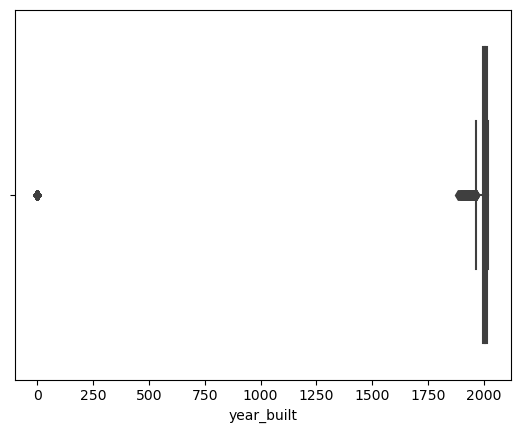

In [32]:
sns.boxplot(df_boats_raw.year_built)

Year built contains 0 values which must be dropped

####  dropping NaN of the year built columns so that we can use this column later on

In [33]:
df_boats_raw = df_boats_raw[df_boats_raw["year_built"] != 0]

C:\Users\dog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_built'>

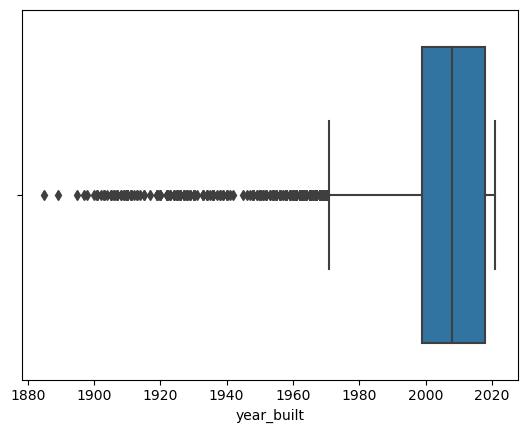

In [34]:
sns.boxplot(df_boats_raw.year_built)

In [35]:
# checking for the rest NaN issues
df_boats_raw.isnull().sum()


Boat Type                      0
Manufacturer                   0
Type                           5
year_built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
currency                       0
value                          0
value_in_eur                   0
Country                        0
dtype: int64

In [36]:
# type contains 6 0 values which must be replaced with unknown
df_boats_raw['Type'].replace([0,np.nan], 'unknown', inplace=True)

In [37]:
# checking what must be changed in the data 
df_boats_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9337 entries, 0 to 9887
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9337 non-null   object 
 1   Manufacturer                 9337 non-null   object 
 2   Type                         9337 non-null   object 
 3   year_built                   9337 non-null   int64  
 4   Length                       9337 non-null   float64
 5   Width                        9337 non-null   float64
 6   Material                     9337 non-null   object 
 7   Location                     9337 non-null   object 
 8   Number of views last 7 days  9337 non-null   int64  
 9   currency                     9337 non-null   object 
 10  value                        9337 non-null   int64  
 11  value_in_eur                 9337 non-null   float64
 12  Country                      9337 non-null   object 
dtypes: float64(3), int

In [38]:
df_boats_raw.drop(labels=['Location'], axis=1, inplace=True)

In [39]:
# renaming columns for better visibility
df_boats_raw = df_boats_raw.rename(columns={'Boat Type': 'boat_type', 'Manufacturer': 'manufacturer', 'Type': 'type', 'Length' : 'length',
                                             'Width': 'width', 'Material': 'material', 'Number of views last 7 days' : 'views_last_7_days',
                                             'Country': 'country'})

In [40]:
df_boats_raw.isnull().sum()

boat_type            0
manufacturer         0
type                 0
year_built           0
length               0
width                0
material             0
views_last_7_days    0
currency             0
value                0
value_in_eur         0
country              0
dtype: int64

In [41]:
df_boats_wrangled = df_boats_raw

In [42]:
df_boats_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9337 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   boat_type          9337 non-null   object 
 1   manufacturer       9337 non-null   object 
 2   type               9337 non-null   object 
 3   year_built         9337 non-null   int64  
 4   length             9337 non-null   float64
 5   width              9337 non-null   float64
 6   material           9337 non-null   object 
 7   views_last_7_days  9337 non-null   int64  
 8   currency           9337 non-null   object 
 9   value              9337 non-null   int64  
 10  value_in_eur       9337 non-null   float64
 11  country            9337 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 948.3+ KB


In [44]:
df_boats_wrangled.isnull().sum()

boat_type            0
manufacturer         0
type                 0
year_built           0
length               0
width                0
material             0
views_last_7_days    0
currency             0
value                0
value_in_eur         0
country              0
dtype: int64

In [43]:
# exporting cleaned and wrangled data frame
df_boats_wrangled.to_csv(os.path.join(path, '02 Prepared Data', 'boat_data_wrangled_new.csv'))